# Exploration of `pymnet` capabilities

> Following [tutorial](https://mnets.github.io/pymnet/overview.html) to explore the functionality available in the `pymnet` package.

## 1. Overview

Additional text can be added here and it will be reflected in the documentation.

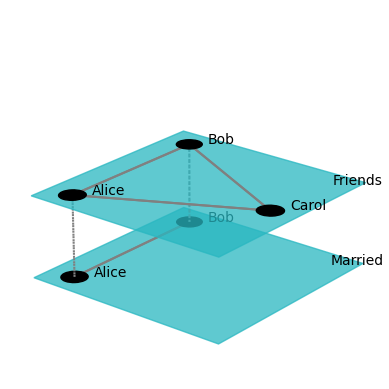

In [ ]:
from pymnet import *

net_social = MultiplexNetwork(couplings="categorical", fullyInterconnected=False)
net_social["Alice", "Bob", "Friends"] = 1
net_social["Alice", "Carol", "Friends"] = 1
net_social["Bob", "Carol", "Friends"] = 1
net_social["Alice", "Bob", "Married"] = 1

fig_social = draw(net_social, layout="circular", layerPadding=0.2, defaultLayerLabelLoc=(0.9,0.9))

Time required to generate different networks:

In [ ]:
import pymnet
net = pymnet.er(10, 10**5*[0.1])

In [ ]:
net = pymnet.er(10**5,10*[10**-5])

## 2. Network types

### Monoplex networks
Monoplex networks have aspect value equals to `0`.

In [ ]:
net = pymnet.MultilayerNetwork(aspects=0)

In [ ]:
net.add_node(1)
net.add_node(2)

In [ ]:
list(net)

[1, 2]

In [ ]:
net[1].deg()

0

Add edge:

In [ ]:
net[1, 2] = 1

In [ ]:
net[1, 3] = 1
list(net)

[1, 2, 3]

In [ ]:
net[1, 2], net[2, 1], net[1, 1]

(1, 1, 0)

In [ ]:
list(net[1])

[2, 3]

In [ ]:
net[1, 3] = 0
list(net[1])

[2]

In [ ]:
net[1, 3] = 2
net[1].deg()

2

In [ ]:
list(net[1])

[2, 3]

In [ ]:
net[1].strength()

3

In [ ]:
dirnet = pymnet.MultilayerNetwork(aspects=0, directed=True)

dirnet[1, 2] = 1

In [ ]:
dirnet[1, 2], dirnet[2, 1]

(1, 0)

In [ ]:
net[2, 1]

1

### Multilayer networks

In [ ]:
mnet = pymnet.MultilayerNetwork(aspects=1)

In [ ]:
mnet.add_node(1)
mnet.add_layer("a")

In [ ]:
mnet[1, "a"].deg()

0

In [ ]:
mnet[1, 2, "a", "b"] = 1

In [ ]:
mnet[1, "a"][2, "b"] = 1

In [ ]:
list(mnet[1, "a"])

[(2, 'b')]

In [ ]:
list(mnet[1, "b"])

[]

In [ ]:
list(mnet)

[1, 2]

Examples of the multilayer net with several aspects:

In [ ]:
mnet2 = pymnet.MultilayerNetwork(aspects=2)
mnet2[1, 2, "a" ,"b", "x" ,"y"] = 1
mnet2[1, "a", "x"][2, "b", "y"]

1

In [ ]:
list(mnet2)

[1, 2]

In [ ]:
list(mnet2[1, "a", "x"])

[(2, 'b', 'y')]

In [ ]:
mnet2.get_layers()

{'a', 'b'}

In [ ]:
mnet2.add_layer("c", 1)
mnet2.add_layer("z", 2)

In [ ]:
mnet2.get_layers()

{'a', 'b', 'c'}

### Multiplex networks

In [ ]:
mplex = pymnet.MultiplexNetwork(couplings="none")

In [ ]:
mplex[1, "a"][2, "a"] = 1

Can access the intra-layer networks as follows:

In [ ]:
mplex.A["a"][1, 2]

1

In [ ]:
mplex.A["a"][1, 3] = 1

In [ ]:
cnet = pymnet.MultiplexNetwork(couplings="categorical")
cnet.add_node(1)
cnet.add_layer("a")
cnet.add_layer("b")
cnet[1, 1, "a", "b"]

1.0

In [ ]:
onet = pymnet.MultiplexNetwork(couplings="ordinal")
onet.add_node("node")
onet.add_layer(1)
onet.add_layer(2)
onet.add_layer(3)
onet["node", "node", 1, 2]

1.0

In [ ]:
onet["node", "node", 1, 3]

0

In [ ]:
cnet = pymnet.MultiplexNetwork(couplings=("categorical", 10))
cnet.add_node(1)
cnet.add_layer("a")
cnet.add_layer("b")
cnet[1, 1, "a", "b"]

10

In [ ]:
conet = pymnet.MultiplexNetwork(couplings=["categorical", "ordinal"])
conet.add_node("node")
conet.add_layer("a", 1)
conet.add_layer("b", 1)
conet.add_layer(1, 2)
conet.add_layer(2, 2)
conet.add_layer(3, 2)
conet["node", "node", "a", "a", 1, 2]

1.0

In [ ]:
conet.A[("a", 1)]["node", "node2"] = 1

## 3. Visualization of networks

In [ ]:
import random
random.seed(42)
import numpy as np
np.random.seed(42)

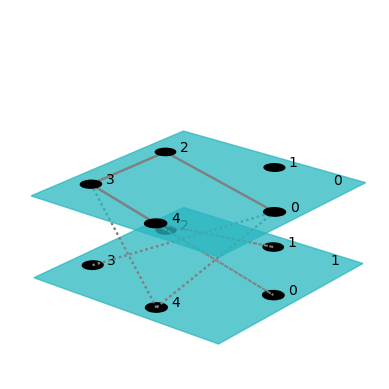

In [ ]:
from pymnet import *
net = models.er_multilayer(5, 2, 0.2)
fig = draw(net, layout="circular", layerPadding=0.2, defaultLayerLabelLoc=(0.9,0.9))

In [ ]:
fig.savefig("er_multilayer.png")

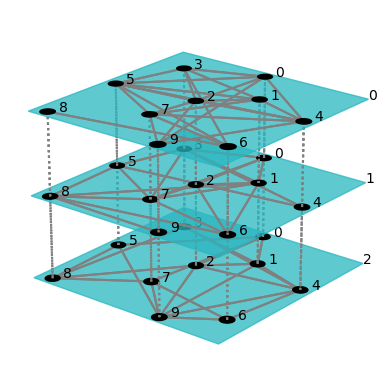

In [ ]:
fig = draw(er(10, 3*[0.5]), layout="spring")

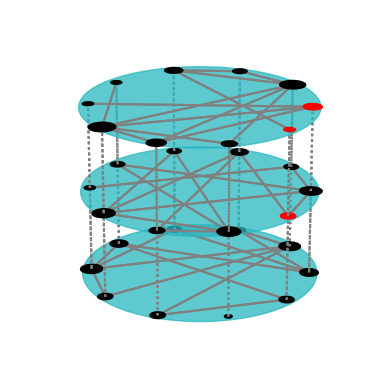

In [ ]:
fig = draw(er(10, 3*[0.3]),
           layout="circular",
           layershape="circle",
           nodeColorDict={(0,0):"r", (1,0):"r", (0,1):"r"},
           layerLabelRule={},
           nodeLabelRule={},
           nodeSizeRule={"rule":"degree", "propscale":0.05}
           )

In [ ]:
import requests
dataset = "bkfrat.dat"
fraternity_dataset_url = f"http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/{dataset}"
res = requests.get(fraternity_dataset_url)
with open(dataset, "wb") as f:
    f.write(res.content)

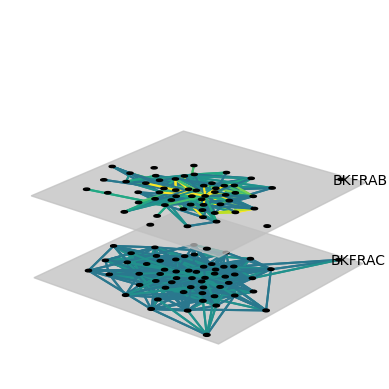

In [ ]:
net = read_ucinet(dataset, couplings="none")
net = transforms.threshold(net, 4)
fig = draw(net,
           layout="spring",
           layerColorRule={},
           defaultLayerColor="silver",
           nodeLabelRule={},
           edgeColorRule={"rule":"edgeweight", "colormap":"viridis", "scaleby":0.1},
           defaultLayerLabelLoc=(0.9,0.9)
           )

## 4. Isomorphysms and automorphisms

### Setup

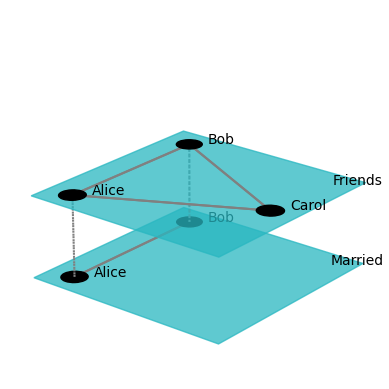

In [ ]:
from pymnet import *
net_social = MultiplexNetwork(couplings="categorical", fullyInterconnected=False)
net_social["Alice", "Bob", "Friends"] = 1
net_social["Alice", "Carol", "Friends"] = 1
net_social["Bob", "Carol", "Friends"] = 1
net_social["Alice", "Bob", "Married"] = 1
# net_social["John", "Bob", "Bussiness"] = 1
fig_social = draw(net_social, layout="circular", layerPadding=0.2, defaultLayerLabelLoc=(0.9,0.9))

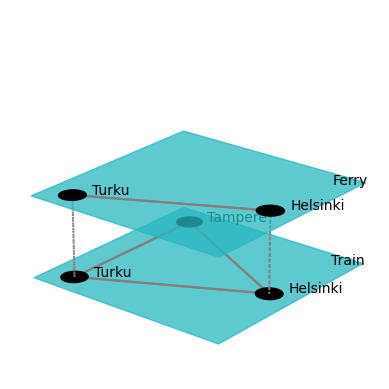

In [ ]:
net_transport = MultiplexNetwork(couplings="categorical", fullyInterconnected=False)
net_transport["Helsinki", "Turku", "Train"] = 1
net_transport["Helsinki", "Tampere", "Train"] = 1
net_transport["Turku", "Tampere", "Train"] = 1
net_transport["Helsinki", "Turku", "Ferry"] = 1
fig_transport = draw(net_transport, layout="circular", layerPadding=0.2, defaultLayerLabelLoc=(0.9,0.9))

### Isomorphisms

In [ ]:
# node isomorphism
is_isomorphic(net_social, net_transport, allowed_aspects=[0])

False

In [ ]:
# layer isomorphism
is_isomorphic(net_transport, net_social, allowed_aspects=[1])

False

In [ ]:
# node-layer isomorphism
is_isomorphic(net_transport, net_social, allowed_aspects=[0, 1])

True

In [ ]:
get_isomorphism(net_transport, net_social)

[{'Helsinki': 'Bob', 'Tampere': 'Carol', 'Turku': 'Alice'},
 {'Ferry': 'Married', 'Train': 'Friends'}]

In [ ]:
net_social_complete_invariant = get_complete_invariant(net_social)
net_transport_complete_invariant = get_complete_invariant(net_transport)
print(net_social_complete_invariant, net_transport_complete_invariant)

((((), 0),), <bliss_bind.NamedGraph object>) ((((), 0),), <bliss_bind.NamedGraph object>)


### Automorphisms

In [ ]:
# node isomorphism
get_automorphism_generators(net_social, allowed_aspects=[0])

[[{'Bob': 'Alice', 'Alice': 'Bob'}, {}]]

In [ ]:
# layer isomorphism
get_automorphism_generators(net_social, allowed_aspects=[1])

[]

In [ ]:
# node-layer isomorphism
get_automorphism_generators(net_social, allowed_aspects=[0, 1])

[[{'Bob': 'Alice', 'Alice': 'Bob'}, {}]]

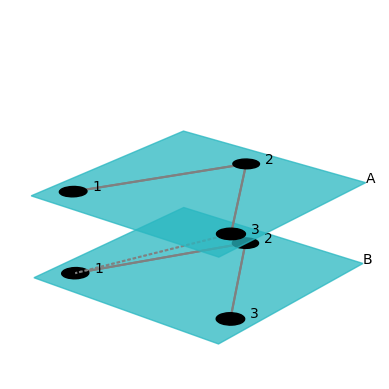

In [ ]:
net = MultilayerNetwork(aspects=1)
net[1, "A"][2, "A"] = 1
net[2, "A"][3, "A"] = 1
net[3, "B"][2, "B"] = 1
net[2, "B"][1, "B"] = 1
net[3, "A"][1, "B"] = 1
fig = draw(net, layerPadding=0.2)

In [ ]:
get_automorphism_generators(net, allowed_aspects=[0])

[]

In [ ]:
get_automorphism_generators(net, allowed_aspects=[1])

[]

In [ ]:
get_automorphism_generators(net, allowed_aspects=[0, 1])

[[{1: 3, 3: 1}, {'A': 'B', 'B': 'A'}]]

## 5. Using NetworkX functions

In [ ]:
from pymnet import nx

In [ ]:
net = nx.karate_club_graph()

In [ ]:
type(net)

pymnet.net.MultilayerNetwork

In [ ]:
net.aspects

0

In [ ]:
import random
random.seed(42)

In [ ]:
import pymnet
{name: nx.number_connected_components(layer) for name, layer in pymnet.er(1000, 3*[0.005]).A.items()}

{0: 10, 1: 9, 2: 5}